In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
from thor_stepm import ThorlabsStageWithStepMotors
from instrumental import instrument,list_instruments,u, Q_
from instrumental.drivers.spectrometers.thorlabs_ccs import CCS
paramsets = list_instruments()
paramsets
ccs = instrument(paramsets[0])
ccs

Exception ignored in: <function CCS.__del__ at 0x0000020928EBD400>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\syst\lib\site-packages\instrumental_lib-0.6.dev0-py3.7.egg\instrumental\drivers\spectrometers\thorlabs_ccs.py", line 169, in __del__
    self.close()
  File "C:\ProgramData\Anaconda3\envs\syst\lib\site-packages\instrumental_lib-0.6.dev0-py3.7.egg\instrumental\drivers\spectrometers\thorlabs_ccs.py", line 188, in close
    self._NiceCCS.close()
AttributeError: 'CCS' object has no attribute '_NiceCCS'


In [16]:
stage = ThorlabsStageWithStepMotors()
stage.set_stage()

Building the device list...
There are 2 devices in the device list
The serial numbers of all the devices are: ['26001683', '26001718']
The motor in the x direction is the one with serial number # 26001683
The motor in the y direction is the one with serial number # 26001718
Connected to KCubeStepperMotor<Thorlabs|KST101|26001683>
Connected to KCubeStepperMotor<Thorlabs|KST101|26001718>
Homing both motors...
Homing done.


In [3]:
stage.move_to_x_y(2.0,2.0)

In [4]:
stage.get_x_y_position()

(1.9999999, 1.9999999)

In [17]:
long_de_onda=[]
intensidad=[]
data = [long_de_onda , intensidad]
for i in np.arange(0.0,1.0,0.1):    
    y,x = ccs.alternative_take_data(integration_time=None, num_avg=1, use_background=False)
    long_de_onda.append(x)
    intensidad.append(y)
    stage.move_to_x_y(i,0.0)

In [ ]:
long_de_onda=[]
intensidad=[]
data = [long_de_onda , intensidad]
t_de_exp = np.linspace(0.00,0.1,0.01)
for t_i in np.t_de_exp:    
    y,x = ccs.alternative_take_data(integration_time=i, num_avg=1, use_background=False)
    long_de_onda.append(x)
    intensidad.append(y)
    

In [25]:
j,i = ccs.take_data(integration_time=None, num_avg=1, use_background=False)

ThorlabsCCSError: b'Timeout expired before operation completed.'

In [ ]:
ccs.stop_and_clear()

In [ ]:
num_avg=1
intensidad=[]

if ccs.cont_scan_in_progress()==True:
    ccs.stop_and_clear()
    integration_time = ccs.get_integration_time()
    integration_time = Q_(integration_time)
    wait_time = integration_time/100.
    ccs.start_continuous_scan()
    for i in range(num_avg):
        time.sleep(integration_time.to('s').magnitude)
        while not ccs.is_data_ready():
            time.sleep(wait_time.to('s').magnitude)
        temp = ccs.get_scan_data()
        if i == 0:
            data = temp
        else:
            data = data + temp
        if sum(temp >= (1.0 - 1e-5)):
            raise Warning('Raw data is saturated')
    ccs.stop_and_clear()
    data = data/num_avg
    x = ccs._wavelength_array
    y = data
    plt.plot(x,y)
else:
    

    

In [31]:
ccs.close()

In [ ]:
ccs.waiting_for_trig()

In [ ]:
ccs.start_continuous_scan()

In [ ]:
ccs.cont_scan_in_progress()

In [20]:
ccs.reset()

In [26]:
ccs.is_data_ready()

True

In [ ]:
ccs._get_raw_scan_data()

In [ ]:
ccs.is_idle()

In [12]:
for i in range(1):
    print(i)

0


In [30]:
y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
plt.plot(x,y)

ThorlabsCCSError: b'Timeout expired before operation completed.'

In [29]:
#ccs.get_scan_data()
for i in range(5):
    y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
    plt.plot(x,y)

ThorlabsCCSError: b'Timeout expired before operation completed.'

In [ ]:
ccs.stop_and_clear()

In [ ]:
ccs.cont_scan_in_progress()

In [ ]:
num_avg=1
intensidad=[]

for i in range(10):
    ccs.reset()
    ccs.stop_and_clear()
    integration_time = ccs.get_integration_time()
    integration_time = Q_(integration_time)
    wait_time = integration_time/100.
    ccs.start_continuous_scan()
    for i in range(num_avg):
        time.sleep(integration_time.to('s').magnitude)
        while not ccs.is_data_ready():
            time.sleep(wait_time.to('s').magnitude)
        temp = ccs.get_scan_data()
        if i == 0:
            data = temp
        else:
            data = data + temp
        if sum(temp >= (1.0 - 1e-5)):
            raise Warning('Raw data is saturated')
    ccs.stop_scan()
    data = data/num_avg
    x = ccs._wavelength_array
    y = data
    plt.plot(x,y)
    intensidad.append(y)
    y=[]

In [ ]:
ccs.close()

In [ ]:
ccs.get_device_info()

In [ ]:
ccs.reset()

In [53]:
y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
plt.plot(x,y)

ThorlabsCCSError: b'Timeout expired before operation completed.'

In [ ]:
import numpy as np
from time import sleep

class AlgunaLaw(ThorlabsStageWithStepMotors,CCS):
    def make_measurement(self, start, stop, num_points, delay):
        x_axis = np.linspace(start, stop, num_points)
        x = []
        y = []
        for i in x_axis:
            # Acquire fake data
            self.stage.move_to_x_y(i,i)
            #j,i = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
            #x.append(i)
            #y.append(j)
            sleep(delay)

        return x,y

In [ ]:
import threading

ohm = AlgunaLaw()

t = threading.Thread(target=ohm.make_measurement, args=(0.0,0.5,4,1))
t.start()
print('Triggered measurement')

In [ ]:
import threading
import queue

def stringFunction(value, out_queue):
    my_str = "This is string no. " + value
    out_queue.put(my_str)
    
    
my_queue = Queue.Queue()
thread1 = threading.Thread(target = ccs.take_data, arg = (integration_time=None, num_avg=1, use_background=False, my_queue))
thread1.start()
thread1.join()
y,x = my_queue.get()
plt.plot(x,y)

In [46]:
import numpy as np
from time import sleep

class OhmLaw(ThorlabsStageWithStepMotors):
    def __init__(self):
        self.datax = np.zeros(0)  # To store the data of the measurement
        self.datay = np.zeros(0)
        self.y = np.zeros(0)
        self.x = np.zeros(0)
        
        self.step = 0  # To keep track of the step
        
    def before_measuring(self):
        stage.move_to_x_y(0.0,0.0)

    def make_measurement(self, start, stop, num_points, delay):
        x_axis = np.linspace(start, stop, num_points)
        self.datax = np.zeros(num_points)
        self.datay = np.zeros(num_points)
        self.y = np.zeros(num_points)
        self.x = np.zeros(num_points)
        self.step = 0
        for i in x_axis:
            # Acquire fake data
            stage.move_to_x_y(i,i)
            if(stage.get_x_y_position() == ()
            self.y[self.step],self.x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
            self.step += 1
            sleep(delay)

        return self.datax,self.datay

In [48]:
import threading
ohm = OhmLaw()

t0 = threading.Thread(target=ohm.before_measuring)
t0.start()
while t0.is_alive():
    print('t0 is alive')
time.sleep(2)
t = threading.Thread(target=ohm.make_measurement, args=(0.0,1.0,5,1))
t.start()
print('Triggered measurement')
i = ohm.step
while t.is_alive():
    if i != ohm.step:
        print('Latest data value: {} mm en x'.format(ohm.datax[ohm.step-1]))
        i = ohm.step

t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 i

t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 is alive
t0 i

Triggered measurement
Latest data value: 0.0236565 mm en x
Latest data value: 0.0 mm en x
Latest data value: 0.25 mm en x
Latest data value: 0.5000001 mm en x
Latest data value: 0.7500001 mm en x


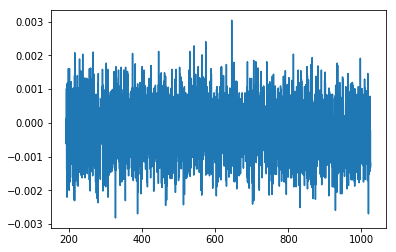

In [50]:
plt.plot(x,y)

In [ ]:
import numpy as np
from time import sleep

class Law(CCS,ThorlabsStageWithStepMotors):
    def __init__(self):
        self.datax = np.zeros(0)  # To store the data of the measurement
        self.datay = np.zeros(0)
        self.step = 0  # To keep track of the step

    def make_measurement(self, start, stop, num_points, delay):
        x_axis = np.linspace(start, stop, num_points)
        self.datax = np.zeros(num_points)
        self.datay = np.zeros(num_points)
        self.step = 0
        for i in x_axis:
            # Acquire fake data
            stage.move_to_x_y(i,i)
            self.datax[self.step],self.datay[self.step] = stage.get_x_y_position()
            self.step += 1
            sleep(delay)

        return self.datax,self.datay

In [40]:
import threading
ohm = OhmLaw()

t = threading.Thread(target=ohm.make_measurement, args=(0.0,1.0,5,1))
t.start()
print('Triggered measurement')
i = ohm.step
while t.is_alive():
    if i != ohm.step:
        print('Latest data value: {} mm en x'.format(ohm.datax[ohm.step-1]))
        i = ohm.step

Triggered measurement
Latest data value: 1.0000002 mm en x
Latest data value: 0.4974785 mm en x
Latest data value: -0.019951 mm en x
Latest data value: 0.4022411 mm en x
Latest data value: 0.7500001 mm en x


In [ ]:
for i in range(5):
    y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
    plt.plot(x,y)
    time.sleep(5)

In [ ]:
import numpy as np
from time import sleep

class Law(CCS):
    def __init__(self):
        self.datax = np.zeros(0)  # To store the data of the measurement
        self.datay = np.zeros(0)
        self.step = 0  # To keep track of the step

    def make_measurement(self, start, stop, num_points, delay):
        x_axis = np.linspace(start, stop, num_points)
        self.datax = np.zeros(num_points)
        self.datay = np.zeros(num_points)
        self.step = 0
        for i in x_axis:
            # Acquire fake data
            stage.move_to_x_y(i,0.0)
            if()
            
            
            self.datax[self.step],self.datay[self.step] = stage.get_x_y_position()
            self.step += 1
            sleep(delay)

        return self.datax,self.datay